Análise exploratória do dataset de perfomance de alunos, com o intuito de entender fatores que possam influênciar no desempenho escolar. 
Base de dados disponível em: "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"

Meu linkedin: https://www.linkedin.com/in/willhsantos/

In [78]:
#Importando pacotes necessários

import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Importando o dataset

df = pd.read_csv('StudentsPerformance.csv')

In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [91]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [93]:
df.shape

(1000, 8)

In [98]:
df.isnull().sum().sort_values(ascending=False)

#Nesse caso, o dataset provavelmente já passou por um tratamento, pois não possuem dados faltantes. Caso contrário, algumas outras análises iriam ser realizadas.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [94]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Verificando a influência do gênero nos resultados das avaliações 

<AxesSubplot:xlabel='gender', ylabel='count'>

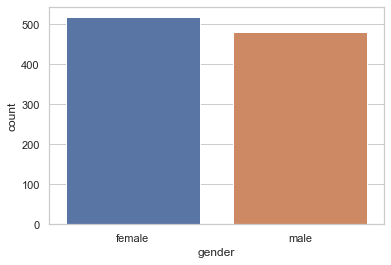

In [82]:
#Quantidade de estudantes por genêro

sns.countplot(df['gender'])

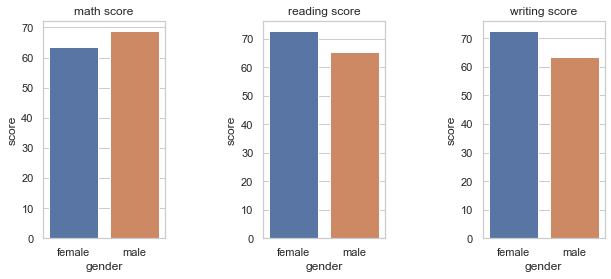

In [83]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()



No método utilizado acima é possível visualizar as 3 matérias, porém, é possível também realizar uma visualização de maneira separada, para cada matéria, em relação ao gênero. Conforme o exemplo que realizo abaixo, com as informações da categoria reading.

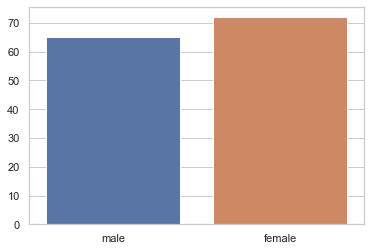

In [100]:
rd_male =df['reading score'][df['gender'] == 'male']
rdscore_male = int(rd_male.mean())

rd_female = df['reading score'][df['gender'] == 'female']
rdscore_female = int(rd_female.mean())

mean_reading_score = pd.DataFrame([[rdscore_male, rdscore_female]], columns=['male', 'female'])

sns.barplot(data=mean_reading_score);


Alunos por nível de escolaridade dos pais 

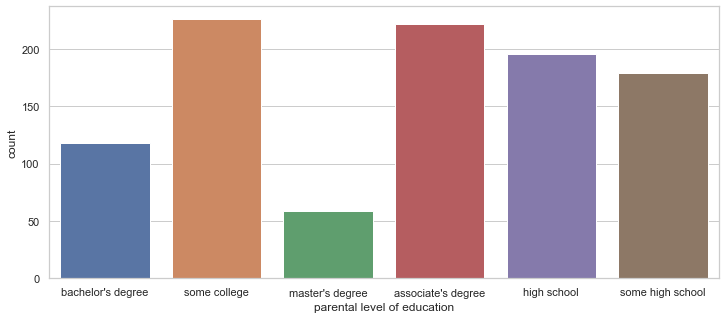

In [84]:
parental_level_education = sns.countplot(df['parental level of education']);
parental_level_education.figure.set_size_inches(12, 5)

Visualizando as notas dos alunos 

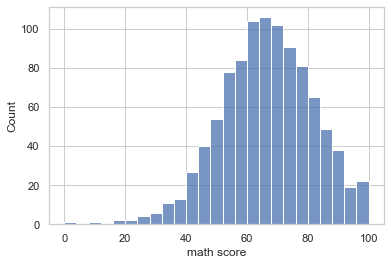

In [85]:
math_notes = df['math score']
sns.histplot(math_notes);

<AxesSubplot:xlabel='reading score', ylabel='Count'>

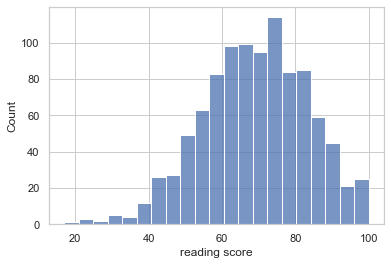

In [89]:
reading_notes = df['reading score']
sns.histplot(reading_notes)

<AxesSubplot:xlabel='writing score', ylabel='Count'>

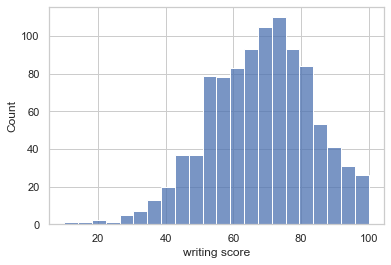

In [90]:
writing_notes = df['writing score']
sns.histplot(writing_notes)